In [1]:
import pandas as pd
import numpy as np

In [2]:
df_full = pd.read_csv('creditcard.csv')
df_full.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df_full.Class.value_counts() 

0    284315
1       492
Name: Class, dtype: int64

In [27]:
LABELS = ["Normal", "Fraud"]

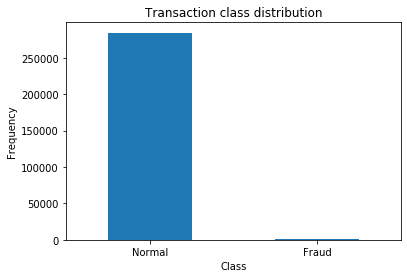

In [28]:
count_classes = pd.value_counts(df_full['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [4]:
df_full.sort_values(by='Class', ascending=False, inplace=True)

In [5]:
df_full.drop('Time', axis=1,  inplace = True)

In [6]:
df_full.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
42635,-7.334341,4.960892,-8.451410,8.174825,-7.237464,-2.382711,-11.508842,4.635798,-6.557760,-11.519861,...,2.153755,0.033922,-0.014095,0.625250,-0.053390,0.164709,1.411047,0.315645,11.38,1
135718,-0.885254,1.790649,-0.945149,3.853433,-1.543510,0.188582,-2.988383,1.344059,-2.294535,-1.886176,...,0.746160,0.550802,-0.034882,-0.567608,-0.528318,0.258782,0.506893,0.176736,7.57,1
10568,-5.268053,9.067613,-15.960728,10.296603,-4.708241,-3.395375,-11.161057,5.499963,-5.667376,-11.627194,...,2.004110,0.191058,0.622928,-1.209264,-0.374799,0.648798,1.584697,0.720056,1.00,1
215132,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,-6.428231,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
144104,-3.365265,2.928541,-5.660999,3.891160,-1.840375,-1.800887,-5.558679,2.402322,-2.848923,-5.995676,...,0.875260,-0.102501,-0.606283,-0.743165,0.096319,-0.135060,1.238695,0.099824,1.00,1


In [7]:
df_sample = df_full.iloc[:3000,:]
df_sample.Class.value_counts()

0    2508
1     492
Name: Class, dtype: int64

In [8]:
feature = np.array(df_sample.values[:,0:29])
label = np.array(df_sample.values[:,-1])

In [9]:
from sklearn.utils import shuffle

shuffle_df = shuffle(df_sample, random_state=42)

df_train = shuffle_df[0:2400]
df_test = shuffle_df[2400:]

In [10]:
train_feature = np.array(df_train.values[:,0:29])
train_label = np.array(df_train.values[:,-1])
test_feature = np.array(df_test.values[:,0:29])
test_label = np.array(df_test.values[:,-1])

In [11]:
train_feature.shape

(2400, 29)

In [12]:
train_label.shape

(2400,)

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(train_feature)
train_feature_trans = scaler.transform(train_feature)
test_feature_trans = scaler.transform(test_feature)

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

import matplotlib.pyplot as plt 
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='best')
    plt.show()

model = Sequential()
model.add(Dense(units=200, 
                input_dim=29, 
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=200,  
                kernel_initializer='uniform', 
                activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,
                kernel_initializer='uniform',
                activation='sigmoid'))

In [31]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               6000      
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 201       
Total params: 46,401
Trainable params: 46,401
Non-trainable params: 0
_________________________________________________________________
None


In [32]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [33]:
train_history = model.fit(x=train_feature_trans, y=train_label,
                          validation_split=0.8, epochs=200, 
                          batch_size=500, verbose=2)

Train on 479 samples, validate on 1921 samples
Epoch 1/200
 - 0s - loss: 0.6992 - accuracy: 0.2317 - val_loss: 0.6884 - val_accuracy: 0.8360
Epoch 2/200
 - 0s - loss: 0.6896 - accuracy: 0.7182 - val_loss: 0.6791 - val_accuracy: 0.8360
Epoch 3/200
 - 0s - loss: 0.6808 - accuracy: 0.8017 - val_loss: 0.6692 - val_accuracy: 0.8360
Epoch 4/200
 - 0s - loss: 0.6714 - accuracy: 0.7996 - val_loss: 0.6581 - val_accuracy: 0.8360
Epoch 5/200
 - 0s - loss: 0.6616 - accuracy: 0.7996 - val_loss: 0.6454 - val_accuracy: 0.8360
Epoch 6/200
 - 0s - loss: 0.6500 - accuracy: 0.7996 - val_loss: 0.6309 - val_accuracy: 0.8360
Epoch 7/200
 - 0s - loss: 0.6366 - accuracy: 0.7996 - val_loss: 0.6143 - val_accuracy: 0.8360
Epoch 8/200
 - 0s - loss: 0.6214 - accuracy: 0.7996 - val_loss: 0.5958 - val_accuracy: 0.8360
Epoch 9/200
 - 0s - loss: 0.6045 - accuracy: 0.7996 - val_loss: 0.5752 - val_accuracy: 0.8360
Epoch 10/200
 - 0s - loss: 0.5894 - accuracy: 0.7996 - val_loss: 0.5531 - val_accuracy: 0.8360
Epoch 11/200

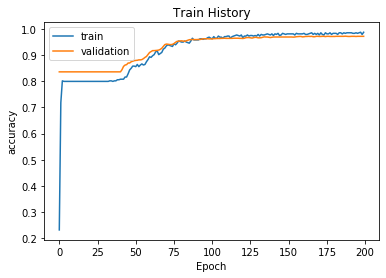

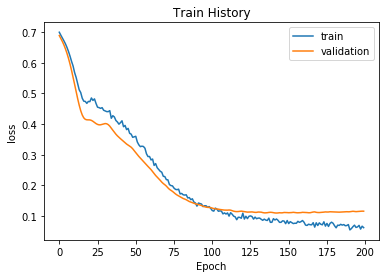

600/600 [==============================] - 0s 33us/step


accuracy= 0.9800000190734863


In [34]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')

scores = model.evaluate(test_feature_trans, test_label)
print('\n')
print('accuracy=',scores[1])

prediction = model.predict_classes(test_feature_trans)